In [2]:
import ftplib
from contextlib import closing
import urllib.request
import io

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import act

In [3]:
username = 'dlhogan@uw.edu'
token = '7f1c805e6ae94c21'

In [4]:
met ='gucmetM1.b1'
radiosonde ='gucsondewnpnM1.b1'
ceil ='gucceilM1.b1'
start = '2022-02-18'
end = '2022-02-21' 

[DOWNLOADING] gucceilM1.b1.20220220.000008.nc
[DOWNLOADING] gucceilM1.b1.20220218.000014.nc
[DOWNLOADING] gucceilM1.b1.20220219.000011.nc
[DOWNLOADING] gucceilM1.b1.20220221.000006.nc


C:\Users\dlhogan\anaconda3\envs\act_env\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


<AxesSubplot:title={'center':'gucceilM1.b1 backscatter on 20220218'}, xlabel='Time [UTC]', ylabel='(m)'>

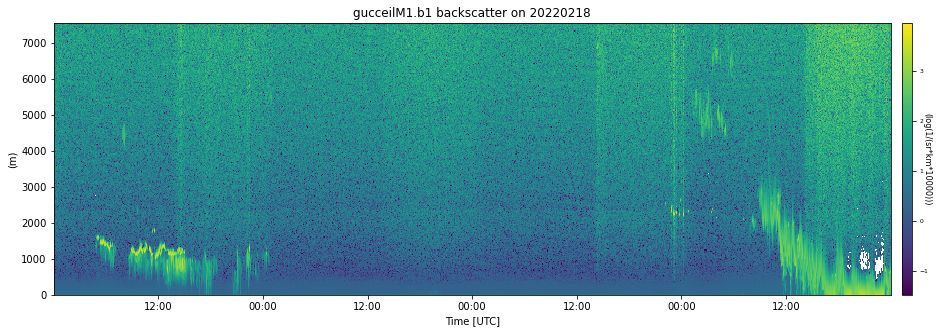

In [29]:
act.discovery.download_data(username, token, ceil,
                            start, end)

ceil_ds = act.io.armfiles.read_netcdf(f'{ceil}/{ceil}.202202*')
ceil_ds = act.corrections.ceil.correct_ceil(ceil_ds, -9999.)
display = act.plotting.TimeSeriesDisplay(
    ceil_ds, subplot_shape=(1, ), figsize=(15, 5))
display.plot('backscatter', subplot_index=(0, ))

C:\Users\dlhogan\anaconda3\envs\act_env\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


<AxesSubplot:title={'center':'gucceilM1.b1 vertical_visibility on 20220218'}, xlabel='Time [UTC]', ylabel='(m)'>

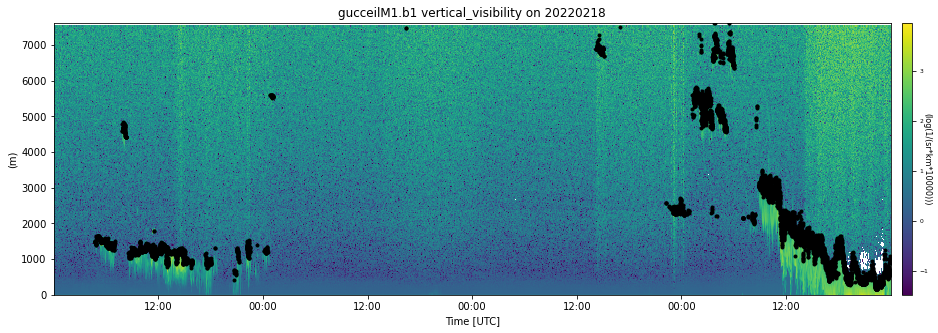

In [38]:
display = act.plotting.TimeSeriesDisplay(
    ceil_ds, subplot_shape=(1, ), figsize=(15, 5))
display.plot('backscatter', subplot_index=(0, ))
display.plot('first_cbh', color='k', subplot_index=(0, ))

nan

In [39]:
# download sonde data
act.discovery.download_data(username, token, radiosonde,
                            start, end)

[DOWNLOADING] gucsondewnpnM1.b1.20220221.112600.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220220.232300.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220218.112800.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220219.112600.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220218.232500.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220219.232700.cdf
[DOWNLOADING] gucsondewnpnM1.b1.20220221.232400.cdf


['c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220221.112600.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220220.232300.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220218.112800.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220219.112600.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220218.232500.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.20220219.232700.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucsondewnpnM1.b1\\gucsondewnpnM1.b1.2022022

In [5]:
sonde_ds = act.io.armfiles.read_netcdf(f'{radiosonde}/{radiosonde}.202202*')

In [22]:
kappa = 2 / 7
sonde_ds = sonde_ds.assign(potential_T = sonde_ds.where(sonde_ds['qc_tdry'] == 0)['tdry'] * (1000 / sonde_ds.where(sonde_ds['qc_tdry'] == 0)['pres']) ** kappa)


In [24]:
sonde_ds['potential_T']

<xarray.DataArray 'potential_T' (time: 37634)>
dask.array<mul, shape=(37634,), dtype=float32, chunksize=(7447,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2022-02-18T11:28:00 ... 2022-02-22T00:40:26

KeyError: 'units'

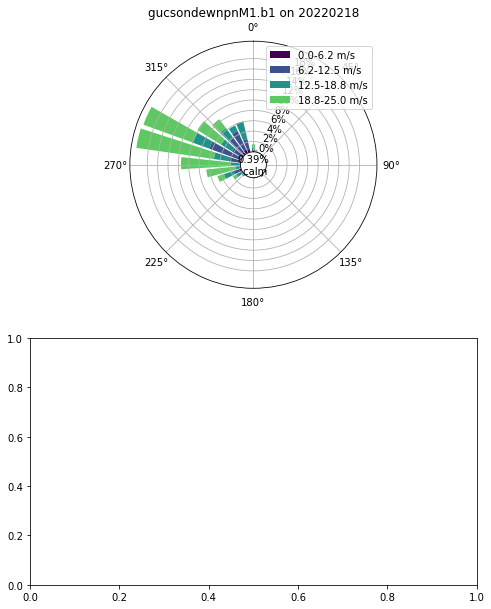

In [23]:
WindDisplay = act.plotting.WindRoseDisplay(sonde_ds, figsize=(8, 10), subplot_shape=(2,))
WindDisplay.plot('deg', 'wspd',
                 spd_bins=np.linspace(0, 25, 5), num_dirs=30,
                 tick_interval=2, subplot_index=(0,))


BarbDisplay = act.plotting.TimeSeriesDisplay(
    {'sonde_darwin': sonde_ds}, figsize=(10, 5))
WindDisplay.put_display_in_subplot(BarbDisplay, subplot_index=(1,))
BarbDisplay.plot_time_height_xsection_from_1d_data('potential_T', 'pres',
                                                   cmap='coolwarm_r',
                                                   num_time_periods=25)
BarbDisplay.plot_barbs_from_spd_dir('deg', 'wspd', 'pres',
                                    num_barbs_x=20)
plt.show()

In [32]:
ftp = ftplib.FTP('ftp.archive.arm.gov') # Connect to NOAA's FTP
ftp.login() # Anonymous login
ftp.cwd('./hogand1/230468')

files = ftp.nlst() # Collect files into vector
ftp.close()

met_files = []
for file in files:
    if 'gucmetM1.b1' in file:
        met_files.append(file)

# used this as reference: https://towardsdatascience.com/an-efficient-way-to-read-data-from-the-web-directly-into-python-a526a0b4f4cb
url = 'ftp://ftp.archive.arm.gov/hogand1/230468/' + met_files[-2]

req = urllib.request.Request(url)
with urllib.request.urlopen(req) as resp:

    act.io.armfiles.read_netcdf(f'{ceil}/*')

TypeError: object of type 'addinfourl' has no len()

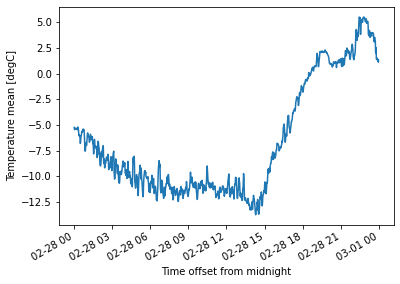

In [19]:
ds2['temp_mean'].plot()

<AxesSubplot:title={'center':'gucmetM1.b1 temp_mean on 20220228'}, xlabel='Time [UTC]', ylabel='(degC)'>

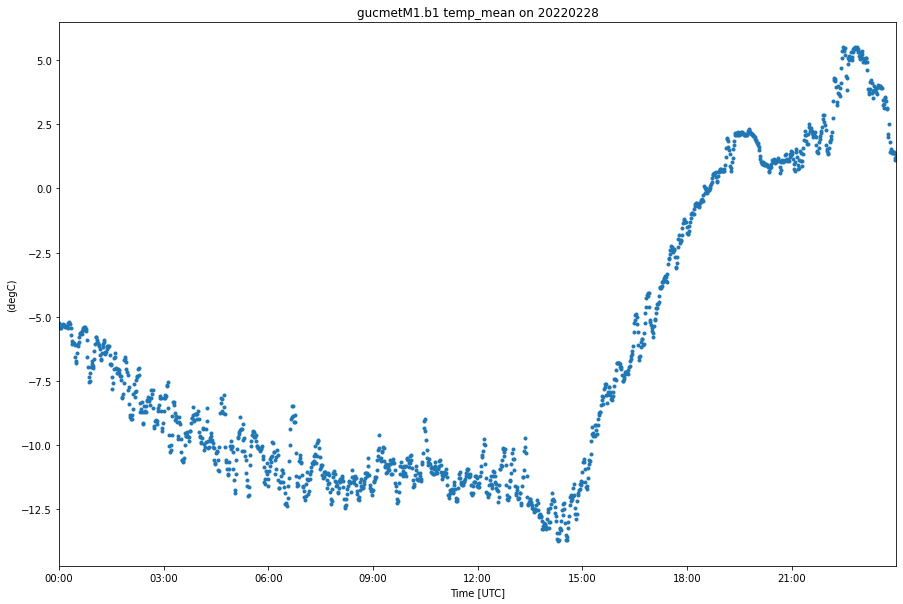

In [31]:
my_disp = act.plotting.TimeSeriesDisplay(
    ds2, subplot_shape=(1, ), figsize=(15, 10))
my_disp.plot('temp_mean', subplot_index=(0, ))

In [59]:
# download sonde data
act.discovery.download_data(username, token, met,
                            start, end)

[DOWNLOADING] gucmetM1.b1.20220220.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220218.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220219.000000.cdf
[DOWNLOADING] gucmetM1.b1.20220221.000000.cdf


['c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucmetM1.b1\\gucmetM1.b1.20220220.000000.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucmetM1.b1\\gucmetM1.b1.20220218.000000.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucmetM1.b1\\gucmetM1.b1.20220219.000000.cdf',
 'c:\\Users\\dlhogan\\OneDrive - UW\\Documents\\GitHub\\sublimation_of_snow\\scripts\\gucmetM1.b1\\gucmetM1.b1.20220221.000000.cdf']

In [60]:
met_ds = act.io.armfiles.read_netcdf(f'{radiosonde}/{radiosonde}.202202*')

In [61]:
met_ds

<xarray.Dataset>
Dimensions:      (time: 37634)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-18T11:28:00 ... 2022-02-22T00:...
Data variables: (12/24)
    base_time    (time) datetime64[ns] 2022-02-18 2022-02-18 ... 2022-02-21
    time_offset  (time) datetime64[ns] 2022-02-18T11:28:00 ... 2022-02-22T00:...
    pres         (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    qc_pres      (time) int32 dask.array<chunksize=(5182,), meta=np.ndarray>
    tdry         (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    qc_tdry      (time) int32 dask.array<chunksize=(5182,), meta=np.ndarray>
    ...           ...
    wstat        (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    asc          (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    qc_asc       (time) int32 dask.array<chunksize=(5182,), meta=np.ndarray>
    lat          (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    lon          (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
    alt          (time) float32 dask.array<chunksize=(5182,), meta=np.ndarray>
Attributes: (12/36)
    command_line:               sonde_ingest -s guc -f M1
    Conventions:                ARM-1.2
    process_version:            ingest-sonde-10.14-1.el7
    dod_version:                sondewnpn-b1-2.3
    input_source:               /data/collection/guc/gucsondeM1.00/good.2022F...
    site_id:                    guc
    ...                         ...
    doi:                        10.5439/1595321
    history:                    created by user dsmgr on machine procnode2 at...
    _file_dates:                ['20220218', '20220218', '20220219', '2022021...
    _file_times:                ['112800', '232500', '112600', '232700', '232...
    _datastream:                gucsondewnpnM1.b1
    _arm_standards_flag:        1

In [ ]:
# download sonde data
act.discovery.download_data(username, token, radiosonde,
                            start, end)